# Project 2: Movies Data Anaylsis

## Table of contens
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
  In this project, we will analyze the moives of 1960 to 2015 by asking questions that we answer from the dataset.

### Questions 

1- Best vote average movie that have been directed by the director of Star Wars: The Force Awakens?

2- Can we see any differnt in movies budgets in the last 8 years?

3- Did we see an improvments in vote average in the last six years?


<a id='wrangling'></a>
## Data Wrangling
First we will check our data if it needs any change or clean.

### Step one: checking the data
here we will take a look of the data we got and if it needs a change or fixing.

In [247]:
import pandas as pd 
import numpy as nb
import matplotlib.pyplot as plt
%matplotlib inline  

df = pd.read_csv('tmdb-movies.csv')

# here we going to check the the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


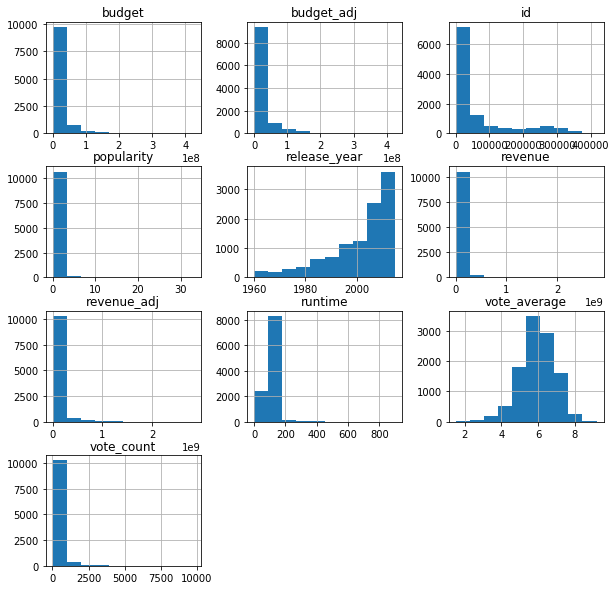

In [248]:
# this figure will help us understant the data more
df.hist(figsize = (10,10));

In [249]:
# this will give us more info on what the dataset is missing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [250]:
# more statistics info
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

### Dropping data
in this step we will drop the columns that we don't need

In [251]:
#after knowing what our questions are we can drop the columns that we don't need
df.drop(['imdb_id','homepage','tagline','keywords','production_companies','overview','runtime','budget_adj','revenue_adj','genres','cast','popularity','vote_count'],axis=1 , inplace=True)
df.head()

,id,budget,revenue,original_title,director,release_date,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,Colin Trevorrow,6/9/15,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,George Miller,5/13/15,7.1,2015
2,262500,110000000,295238201,Insurgent,Robert Schwentke,3/18/15,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,12/15/15,7.5,2015
4,168259,190000000,1506249360,Furious 7,James Wan,4/1/15,7.3,2015


### Checking null values
in this step we will check if we have null values, and drop them if there is.

In [252]:
# checks if we have nulll values 
df.isnull().sum().any()

True

In [253]:
#dropping the null values
df.dropna(inplace=True)
df.isnull().sum().any()

False

In [254]:
#after droping the null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10822 non-null  int64  
 1   budget          10822 non-null  int64  
 2   revenue         10822 non-null  int64  
 3   original_title  10822 non-null  object 
 4   director        10822 non-null  object 
 5   release_date    10822 non-null  object 
 6   vote_average    10822 non-null  float64
 7   release_year    10822 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 760.9+ KB


### Checking Duplicates
in this step we will check if we have duplicates, and drop them if there is.

In [255]:
# here we should check if we have duplicates
sum(df.duplicated())

1

In [256]:
# as we see we have 1 duplicate we should drop it
df.drop_duplicates(inplace =True)
#we should check if it worked
sum(df.duplicated())

0

### Dropping zero values
as we know, nothing is free so zero budget or revenue means there is missing data. So we should drop them.

In [257]:
df.drop(df[df['budget'] == 0].index, axis=0, inplace=True)
df.drop(df[df['revenue'] == 0].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3853 non-null   int64  
 1   budget          3853 non-null   int64  
 2   revenue         3853 non-null   int64  
 3   original_title  3853 non-null   object 
 4   director        3853 non-null   object 
 5   release_date    3853 non-null   object 
 6   vote_average    3853 non-null   float64
 7   release_year    3853 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 270.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis
After cleaning our data, now we should start looking for answer for our quetions.

### Question 1
Best vote average movie that have been directed by the director of Star Wars: The Force Awakens?


In [258]:
# here we should find who is the directer of the moive
df_m = df[df['original_title'] == "Star Wars: The Force Awakens"]
df_m.head()

,id,budget,revenue,original_title,director,release_date,vote_average,release_year
3,140607,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,12/15/15,7.5,2015


In [260]:
#after we found the name of the director('J.J. Abrams'),we should view he's moives
df_jj = df[df['director'] == "J.J. Abrams"]
df_jj.head()   

,id,budget,revenue,original_title,director,release_date,vote_average,release_year
3,140607,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,12/15/15,7.5,2015
1391,13475,150000000,385680446,Star Trek,J.J. Abrams,5/6/09,7.3,2009
3400,37686,50000000,260095987,Super 8,J.J. Abrams,6/8/11,6.6,2011
5435,54138,190000000,467365246,Star Trek Into Darkness,J.J. Abrams,5/5/13,7.4,2013
6561,956,150000000,397850012,Mission: Impossible III,J.J. Abrams,5/3/06,6.3,2006


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

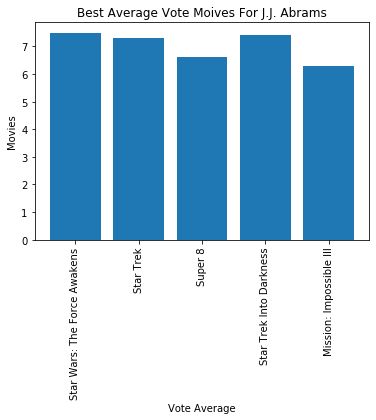

In [261]:
# we should use visual to make it more clear
yaxis =df_jj['vote_average']
xaxis = df_jj['original_title']

plt.bar(xaxis,yaxis);
plt.ylabel('Movies')
plt.xlabel("Vote Average")
plt.title('Best Average Vote Moives For J.J. Abrams')
plt.xticks(rotation=90)


### Findings
From the dataset and the visualisation, We can see that the best moive that have been directed by J.J. Abrams: Star Wars: 'The Force Awakens', that got an average vote of 7.5.

### Question 2
Can we see any differnt in movies budgets in the last 8 years?

In [262]:
# in this step we need to create a query that stores years from 2008 to 2015
years = df.query('release_year >= 2008')

# then we to group them by 'release_year', we use the mean to see every year mean budget
years.groupby('release_year').mean()

,id,budget,revenue,vote_average
release_year,,,,
2008,11528.506024,4.285167e+07,1.141562e+08,6.053012
2009,19728.034483,4.332085e+07,1.241789e+08,6.051724
2010,35998.893258,4.754572e+07,1.224964e+08,6.103371
2011,57208.728643,4.241985e+07,1.176294e+08,6.103518
2012,79870.493671,4.802285e+07,1.530662e+08,5.989241
2013,124914.644444,4.759957e+07,1.352815e+08,6.200000
2014,195010.987879,4.481072e+07,1.458786e+08,6.336970
2015,251026.237500,4.481736e+07,1.637683e+08,6.243750


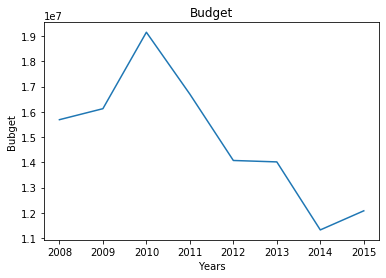

In [263]:
#here we start specifying years that we need
aar_years= [2008,2009,2010,2011,2012,2013,2014,2015]

#Budget for each year we specified 
arr_budget=[1.568803e+07,1.612399e+07,1.915306e+07,1.670028e+07,1.407157e+07,1.401523e+07,1.131999e+07,1.207718e+07]

#we use those arrays in our visual
plt.plot(aar_years,arr_budget)
plt.xlabel('Years')
plt.ylabel('Bubget')
plt.title('Budget')
plt.show()

### Findings 
here we see that the budgets of movies have jumped up from 2008 to 2010, since then the budget had been decreasing.
In 2014 we also see that the budget is seeing some increasing but i don't think it going back like before.

### Question 3
Did we see an improvments in vote average in the last six years?


In [264]:

# As we see here, we made a query that contains moives with release year 2015
dfn = df.query('release_year >= 2010')

dfn.groupby('release_year').mean()

,id,budget,revenue,vote_average
release_year,,,,
2010,35998.893258,4.754572e+07,1.224964e+08,6.103371
2011,57208.728643,4.241985e+07,1.176294e+08,6.103518
2012,79870.493671,4.802285e+07,1.530662e+08,5.989241
2013,124914.644444,4.759957e+07,1.352815e+08,6.200000
2014,195010.987879,4.481072e+07,1.458786e+08,6.336970
2015,251026.237500,4.481736e+07,1.637683e+08,6.243750


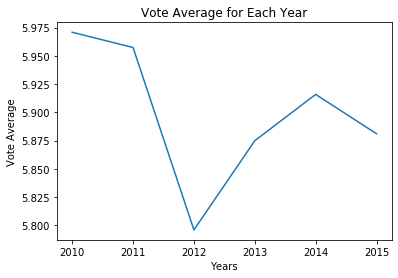

In [265]:

arr_years = [2010,2011,2012,2013,2014,2015]

arr_vote =[5.970833,5.957328,5.795890,5.874809,5.915827,5.880990]


plt.plot(arr_years,arr_vote)
plt.xlabel('Years')
plt.ylabel('Vote Average')
plt.title('Vote Average for Each Year')
plt.show()

### Findings 
As we see the vote averages has an ups and downs through the six years period, but since the decrease of 2010 it never recoverd the same vote average. I think in the following years we see more ups and downs with the hope it goes up cause the better the average vote are the better movies are.

<a id='conclusions'></a>
## Conclusions
After Ansewring our questions, We can see that the budget deacresing does not mean movies has gotten worse over the years, infact that means, the use of movies budget has gotten better over the years. Vote average had been really not stable, in 2012 we saw the lowest vote average since 2010, from 2013 to 2015 it got better but never the same. even the director of the film star wars "J.J. Abrams" got the secound worst vote average in 2011 with 6.6 Vote average. while star wars got 7.5 vote average. 


## Limitations
I found that if i have a column that contains contry that the movie had got most views would really benefit my analysis